In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
df = pd.read_csv("Fare_Card_History_for_Metropolitan_Transportation_Authority__MTA___Beginning_2010.csv")

In [3]:
df["Station"] = df.Station.str.strip()
df['Fares']=df.iloc[:,4:].sum(axis=1, numeric_only=True)
def todate(test):
    return datetime.datetime.strptime(test, "%m/%d/%Y").date()

df['From Date2']=df['From Date'].apply(todate)
df['To Date2']=df['To Date'].apply(todate)

In [4]:
df['From Date2'] = pd.to_datetime(df['From Date'], infer_datetime_format=True)
df['To Date2'] = pd.to_datetime(df['To Date'], infer_datetime_format=True)
df.head()

,From Date,To Date,Remote Station ID,Station,Full Fare,Senior Citizen / Disabled,7 Day ADA Farecard Access System Unlimited,30 Day ADA Farecard Access System Unlimited,Joint Rail Road Ticket,7 Day Unlimited,...,Mail and Ride EZPass Express,Mail and Ride Unlimited,Path 2 Trip,Airtran Full Fare,Airtran 30 Day,Airtran 10 Trip,Airtran Monthly,Fares,From Date2,To Date2
0,02/13/2016,02/19/2016,R001,WHITEHALL STREET,46710,1811,264,756,231,21775,...,1202,470,0,843,0,0,0,107378,2016-02-13,2016-02-19
1,02/13/2016,02/19/2016,R003,CYPRESS HILLS,2793,138,14,40,0,2171,...,6,9,0,7,0,0,0,6527,2016-02-13,2016-02-19
2,02/13/2016,02/19/2016,R004,75TH STREET & ELDERTS LANE,7229,356,28,102,0,5144,...,32,52,0,75,0,0,0,17369,2016-02-13,2016-02-19
3,02/13/2016,02/19/2016,R005,85TH STREET & FOREST PKWAY,7998,441,36,177,4,5407,...,51,76,0,70,0,0,0,19636,2016-02-13,2016-02-19
4,02/13/2016,02/19/2016,R006,WOODHAVEN BOULEVARD,7641,422,27,149,1,6857,...,72,61,0,64,0,0,0,20956,2016-02-13,2016-02-19


In [5]:
df2 =df[df['From Date2'].apply(lambda x : x.month==9)]
df2 =df2[df2['To Date2'].apply(lambda x : x.month==9)]
df2.head()
df2.columns

Index(['From Date', 'To Date', 'Remote Station ID', 'Station', 'Full Fare',
       'Senior Citizen / Disabled',
       '7 Day ADA Farecard Access System Unlimited',
       '30 Day ADA Farecard Access System Unlimited', 'Joint Rail Road Ticket',
       '7 Day Unlimited', '30 Day Unlimited',
       '14 Day Reduced Fare Media Unlimited', '1 Day Unlimited',
       '14 Day Unlimited', '7 Day Express Bus Pass', 'Transit Check Metrocard',
       'LIB Special Senior', 'Rail Road Unlimited No Trade',
       'Transit Check Metrocard Annual Metrocard',
       'Mail and Ride EZPass Express', 'Mail and Ride Unlimited',
       'Path 2 Trip', 'Airtran Full Fare', 'Airtran 30 Day', 'Airtran 10 Trip',
       'Airtran Monthly', 'Fares', 'From Date2', 'To Date2'],
      dtype='object')

In [6]:
len(df2.groupby(['Station']))

515

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

df2.groupby(['Station']).Fares.mean().sort_values(ascending=False).reset_index().head(20)

,Station,Fares
0,14TH STREET-UNION SQUARE,631589.379310
1,59TH STREET/COLUMBUS CIRCLE,418800.689655
2,34TH STREET & 6TH AVENUE,343992.672414
3,86TH STREET-LEXINGTON AVE,337666.793103
4,47-50 STREETS/ROCKEFELLER,309273.310345
5,34TH STREET - PENN STATION,301025.931034
6,42ND STREET/TIMES SQUARE,295701.965517
7,PARK PLACE,289990.379310
8,ROOSEVELT AVE/JACKSON HTS,283746.586207
9,42ND STREET & 8TH AVENUE,282434.603448


In [8]:
df2.groupby(['Station']).Fares.sum().sort_values(ascending=False).reset_index().head(20)

,Station,Fares
0,42ND STREET & GRAND CENTRAL,22140540
1,34TH STREET & 6TH AVENUE,19951575
2,14TH STREET-UNION SQUARE,18316092
3,42ND STREET/TIMES SQUARE,17150714
4,42ND STREET & 8TH AVENUE,16381207
5,34TH STREET & 8TH AVENUE,13281543
6,59TH STREET/COLUMBUS CIRCLE,12145220
7,59TH STREET & LEXINGTON AVE,10217456
8,86TH STREET-LEXINGTON AVE,9792337
9,47-50 STREETS/ROCKEFELLER,8968926


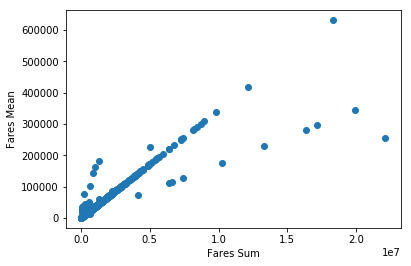

In [9]:
df3 = pd.DataFrame()

df3['Fares_std']=df2.groupby(['Station']).Fares.std()
df3['Fares_sum']=df2.groupby(['Station']).Fares.sum()
df3['Fares_mean']=df2.groupby(['Station']).Fares.mean()
df3.head()

import matplotlib.pyplot as plt
plt.scatter(df3.Fares_sum, df3.Fares_mean)
plt.xlabel('Fares Sum')
plt.ylabel('Fares Mean')
plt.show()

In [10]:
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.plotting import ColumnDataSource
from bokeh.models import HoverTool

stations = list(df2['Station'].unique())

hover_tool = HoverTool(tooltips =[
    ('Station', '@Station'),
    ('Sum', '@Fares_sum'),
    ('Mean','@{Fares_mean}')
])

plot = figure()
data = ColumnDataSource(df3)
plot.circle(x = 'Fares_sum', y = 'Fares_mean', source = data, alpha=0.5)
plot.add_tools(hover_tool)
output_file('bokeh_plot1.html')
show(plot)

In [ ]:
df3.sort_values(by='Fares_sum', ascending=False).head(20)

In [ ]:
df2.groupby(['Station', 'From Date2']).Fares.sum().reset_index()

In [ ]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.plotting import ColumnDataSource
from bokeh.models import HoverTool

output_notebook()

stations = list(df2['Station'].unique())

hover_tool = HoverTool(tooltips =[
    ('Station', '@Station'),
    ('Total Fares', '@Fares'),
    ('Date','@{From Date2}')
])

plot = figure()
for station in stations:
    data = ColumnDataSource(df2[df2['Station']==station])
    plot.circle(x = 'From Date2', y = 'Fares', source = data, alpha=0.2, hover_fill_color="firebrick", hover_alpha=0.5)
show(plot)